# Project One 

**(Note. I changed my dataset completely, so project 1 is technically not marked for me.)**

In these projects, I aim to determine how prices in King County are influenced. In order to do so, amongst other things, I will conduct data visualizations, correlations etc. in order to better understand my research topic.

**Introduction**

**Project 1 scope - How influential are the number of bedrooms and bathrooms in predicting a house's price?**

The home improvement/remodelling industry in the United States is valued at roughly $395 billion dollars. A significant fraction of this value is derived from adding an extra bedroom, and sometimes, bathrooms to existing homes in the hope of it significantly affecting home value. In this dataset, we take a look at homes sold in King County in Seattle to uncover this relationship. 

This project essentially aims to analyze the relationship the price of a house sold in 
King County and the number bedrooms & bathrooms it has.

We obtained the dataset for the above from -https://www.kaggle.com/harlfoxem/housesalesprediction, which was uploaded by an anonymous user based in Nice, Provence-Alpes-Côte d'Azur, France.

Our dependent variable (Y) is the price (price) and our independent variables are number of bedrooms (bedrooms) &  bathrooms (bathrooms).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qeds as qd

df = pd.read_csv(r'/Users/shivkhosla/Desktop/ECO225/Airbnb/kc_house_data.csv') #extracting data from dataset

In [2]:
df['date'] = pd.to_datetime(df['date']) # correcting format for data


corr = df.corr()
print(corr)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

In [3]:
df.shape

(21613, 21)

In [4]:
df.describe()
df.yr_built.describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

## Cleaning the Dataset
 
Since our analysis only focuses on 3 main variables, we can go ahead and drop the variables that are of no use to us. However, we are still keeping the date the house was sold as it helps us understand the data in a larger context.

To do so, we first drop all null values, and then proceed to dropping the variables.


In [5]:
df.dropna()
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
newdf = df.drop(columns = ['id',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15', 'waterfront', 'view', 'yr_built'])

In [7]:
newdf

,date,price,bedrooms,bathrooms
0,2014-10-13,221900.0,3,1.00
1,2014-12-09,538000.0,3,2.25
2,2015-02-25,180000.0,2,1.00
3,2014-12-09,604000.0,4,3.00
4,2015-02-18,510000.0,3,2.00
...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50
21609,2015-02-23,400000.0,4,2.50
21610,2014-06-23,402101.0,2,0.75
21611,2015-01-16,400000.0,3,2.50


Assigning bedrooms and bathrooms to be independent variables, and price to be the dependent variable.

In [8]:
x1 = newdf['bedrooms']
x2 = newdf['bathrooms']
y = newdf['price']

In [9]:
newdf.sum()

price        1.167293e+10
bedrooms     7.285400e+04
bathrooms    4.570625e+04
dtype: float64

In [10]:
newdf.bedrooms.sum()

72854

In [11]:
newdf.bathrooms.sum()

45706.25

In [12]:
newdf.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [13]:
newdf.describe()

,price,bedrooms,bathrooms
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757
std,3.671272e+05,0.930062,0.770163
min,7.500000e+04,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000
50%,4.500000e+05,3.000000,2.250000
75%,6.450000e+05,4.000000,2.500000
max,7.700000e+06,33.000000,8.000000


From the above python commands, we have obtained an overview/summary of our variables of interest. The mean selling prices of houses is 540,000 dollars, mean number of bedrooms is 3.37 and lastly, the mean number of bathrooms is 2.11. One statistic in particular that stands out is the median house price, which is 90,000 dollars less than the mean house price at 450,000. This tells us that there are several houses that are sold at extremely high prices, thereby skewing our mean upwards. This can be corroborated by the fact that the maximum selling price of a house in this dataset is 7.7 million dollars.

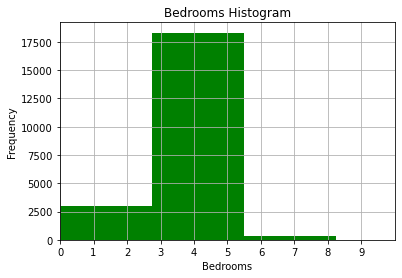

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(newdf['bedrooms'], bins = 12, color= 'g') 
ax.grid(which='major')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Bedrooms Histogram') 
plt.xlim([0, 10])
# plt.ylim([0, 3])
# plt.yticks(np.arange(0, 4, 0.5))
plt.xticks(np.arange(0, 10, 1))
plt.show()

From the above histogram, we can see that the majority of homes that are sold are concentrated in the 3-5 bedroom region, and that relatively, very few homes are sold with more than 5 bedrooms.

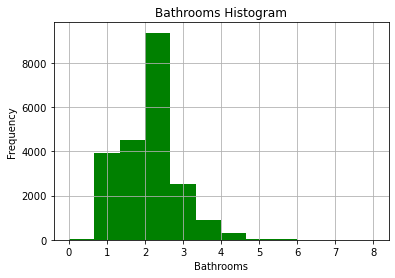

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(newdf['bathrooms'], bins = 12, color= 'g') 
ax.grid(which='major')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Bathrooms Histogram') 
plt.show()

From the above histogram, we can see that the majority of homes that are sold are concentrated in the 2-3 bathroom region, and that relatively, very few homes are sold with more than 3 bedrooms.

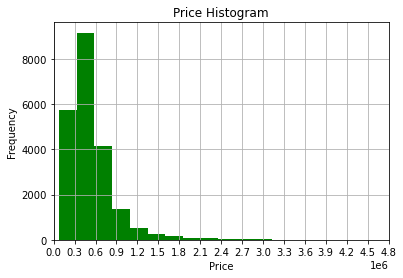

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(newdf['price'], bins = 30, color= 'g') 
ax.grid(which='major')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram') 
plt.xlim([0, 3000000])
plt.xticks(np.arange(0, 5000000, 300000))
plt.show()

From the above histogram, we can see that the majority of homes that are sold less than a million dollar price tag.
As soon as we cross the million dollar mark, house sales decline significantly as compared to an earlier range of 500K. This is presumably a characteristic feature of King County, where we can assume the majority of the demographic is Lower Middle and Upper Middle class.

In [17]:
y.corr(x1)

0.3083495981456382

In [18]:
y.corr(x2)

0.5251375054139615

Text(0, 0.5, 'Prices')

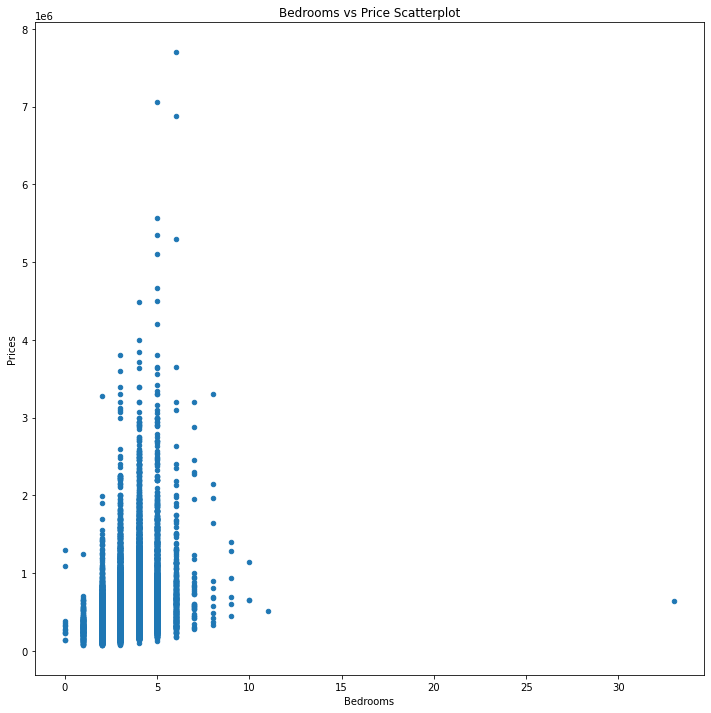

In [42]:
newdf.plot.scatter(x = "bedrooms", y = 'price', figsize = (12,12))
plt.title('Bedrooms vs Price Scatterplot') 
plt.xlabel('Bedrooms')
plt.ylabel('Prices')

Text(0, 0.5, 'Prices')

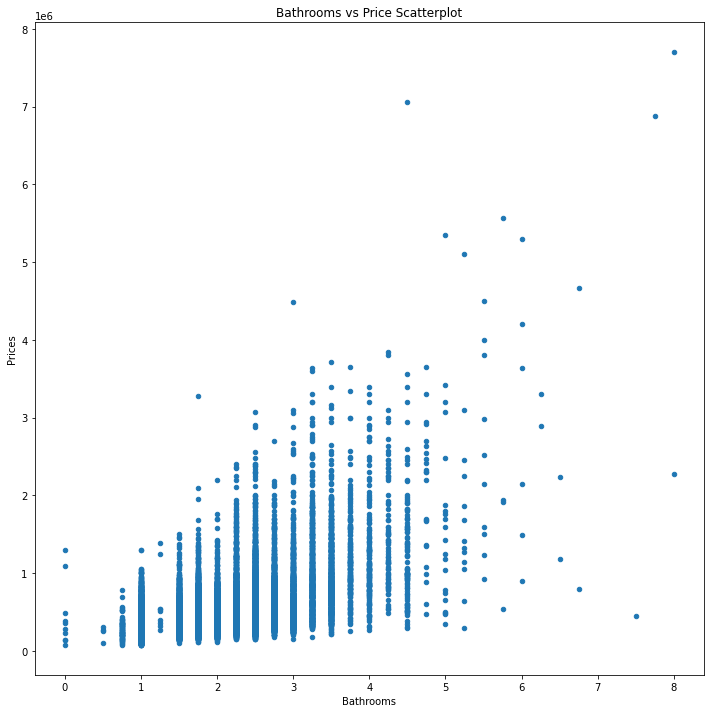

In [43]:
newdf.plot.scatter(x = "bathrooms", y = 'price', figsize = (12,12))
plt.title('Bathrooms vs Price Scatterplot') 
plt.xlabel('Bathrooms')
plt.ylabel('Prices')

# Conclusion (part 1)

As we can see from the above analysis, although bedrooms and bathrooms have a positive effect on prices, it is not a 1:1 effect as most people would think. This is especially true for bedrooms, as we can see in the scatter plot, for a given number of bedrooms the price is extremely variable, which means there are more factors that need to be accounted for. In further projects, I plan to model these prices using regression methods, and predict prices of houses through machine learning algorithms.

# Project Two

**Introduction**

In the second project, I will be looking beyond presumably rather obvious characteristics such as bedrooms and bathrooms; these characteristics are in the form of the view of the house, whether the house has a waterfront and the quality of design and construction of the houses.

## Part Two

In [21]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm #for linear regression: sm.ols

from pandas_datareader import DataReader

%matplotlib inline

In [22]:
newdf2 = df.copy()
newdf2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Cleaning the Dataset**


Removing all unnecessary variables for analysis.

In [23]:
newdf2.dropna()
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [24]:
newdf3 = newdf2.drop(columns = ['id',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'])
newdf3.head()

,date,price,bedrooms,bathrooms,waterfront,view,grade,yr_built
0,2014-10-13,221900.0,3,1.00,0,0,7,1955
1,2014-12-09,538000.0,3,2.25,0,0,7,1951
2,2015-02-25,180000.0,2,1.00,0,0,6,1933
3,2014-12-09,604000.0,4,3.00,0,0,7,1965
4,2015-02-18,510000.0,3,2.00,0,0,8,1987


## Message

I want to uncover the relationship between certain preferential characteristics, and prices of the houses. Therefore, the question, I will be answering in this visaulization is "What is the relationship between house prices, and preferential characteristics such as the view of the house, whether the house has a waterfront, and the quality of the design and construction of the house? Specifically, whether these characteristics play a significant role in determining the house prices?"

In order to answer this question, after rigorous thinking, I chose a boxplot distribution to display the data. I think a boxplot is best suited for this question becuase it allows us to fix the characteristic we are looking at; for example, at view = 1 etc., we can see the range of prices and so on, and so forth. No other visualization (scatter, line) would be able to answer this question effectively. Through a boxplot, we can see the distribution of house prices across different levels on one graph.

<AxesSubplot:title={'center':'price'}, xlabel='grade'>

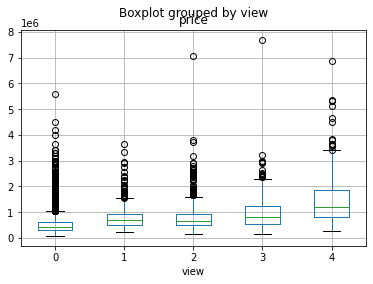

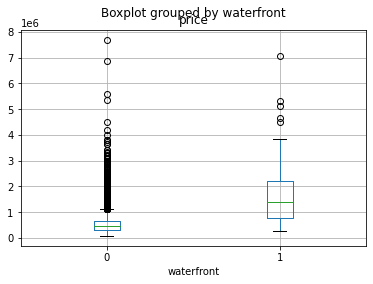

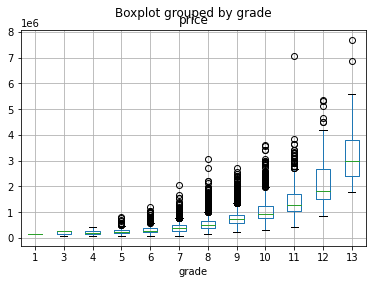

In [25]:
newdf3.boxplot(column='price', by = 'view')

newdf3.boxplot(column='price', by = 'waterfront')

newdf3.boxplot(column='price', by = 'grade')

In the above boxplots, the relationship between different levels of our chosen characteristics can be seen for a range of prices. Through the above boxplots, we can infer that view is the least effective characteristic in determining the prices of houses in King county, followed by waterfront and then lastly, the most effective characteristic, grade (design and quality of construction).
Whether the house has a view almost seems inconsequential to prices in the area. However, the same cannot be said for grade (design and quality of construction of houses), as we can obseerve the prices rising significantly from the level 1 to level 13. 

Since this visualization effectively answers the question, we can focus on fine-tuning the the boxplots so it looks more aesthetically appealing while effectively answering the question.

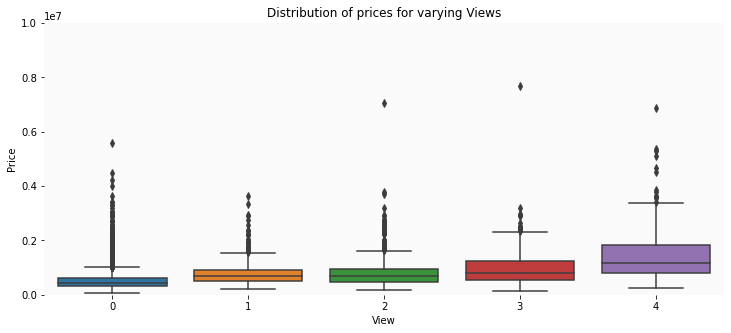

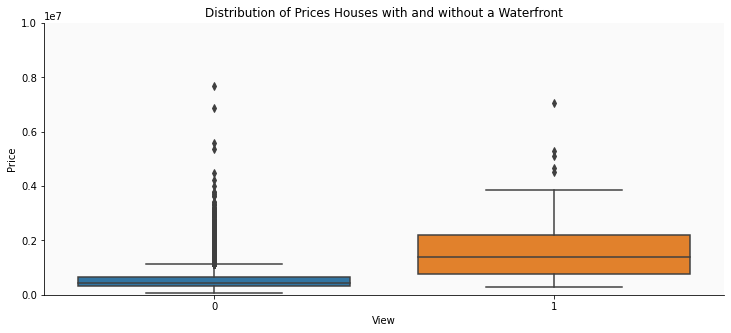

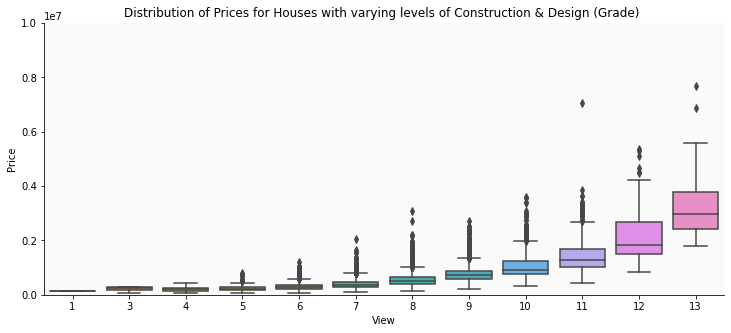

In [26]:
# Boxplot 1
f, ax = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=newdf3['view'],y=newdf3['price'])

# Turn off right and top axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.despine(left=True, bottom=True)

#Setting Labels
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Distribution of prices for varying Views') 

#Setting the scale right for Prices
plt.ylim([0, 10000000])

bgcolor = (250/255, 250/255, 250/255)
ax.set_facecolor(bgcolor)


# Boxplot 2
f, ax = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=newdf3['waterfront'],y=newdf3['price'])
#Setting labels
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Distribution of Prices Houses with and without a Waterfront') 

# Turn off right and top axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Setting the scale right for Prices
plt.ylim([0, 10000000])

bgcolor = (250/255, 250/255, 250/255)
ax.set_facecolor(bgcolor)

#Boxplot 3
f, ax = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=newdf3['grade'],y=newdf3['price'])

#Setting labels
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Distribution of Prices for Houses with varying levels of Construction & Design (Grade) ') 

# Turn off right and top axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Setting the scale right for Prices
plt.ylim([0, 10000000])

bgcolor = (250/255, 250/255, 250/255) #RGBA tuples, components represent red, green, blue
ax.set_facecolor(bgcolor)



Above is the fine-tuned version of the boxplot we had made earlier in the project.

## Part Three


## Map 1

In [44]:
#Importing required libraries for map construction.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qeds as qd
import matplotlib.colors as mplc
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.formula.api as sm #for linear regression: sm.ols
import geopandas as gpd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

from pandas_datareader import DataReader

df = pd.read_csv(r'/Users/shivkhosla/Desktop/ECO225/Airbnb/kc_house_data.csv') #extracting data from dataset
df['date'] = pd.to_datetime(df['date']) # correcting format for data

**The first map we will attempt to make is a heat-map of average prices of houses by zipcode.**

In order to do this, we will have to group the data by zipcode and then take the average of all the variables. This way, we will have a quantitative measure of the average prices in each zip code of the county.

In [29]:
grouped_df= df.groupby("zipcode")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,0.000000,0.102210,3.337017,7.295580,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,6.693467,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,3.371429,7.542857,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
4,98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,3.696429,8.488095,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,98177,3.934998e+09,6.761854e+05,3.396078,2.100000,2323.333333,11904.403922,1.276471,0.003922,0.815686,3.494118,7.976471,1836.713725,486.619608,1960.843137,172.145098,47.742381,-122.369282,2186.196078,11690.239216
66,98178,4.291467e+09,3.106128e+05,3.305344,1.731870,1729.351145,8309.122137,1.185115,0.034351,0.534351,3.320611,6.816794,1325.992366,403.358779,1955.232824,84.057252,47.499118,-122.246969,1648.816794,8149.641221
67,98188,4.481851e+09,2.890783e+05,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,0.147059,3.330882,7.036765,1492.154412,310.617647,1965.507353,43.794118,47.447310,-122.280993,1636.279412,9752.801471
68,98198,5.152291e+09,3.028789e+05,3.182143,1.788393,1745.360714,10525.978571,1.225000,0.035714,0.592857,3.442857,7.103571,1476.253571,269.107143,1966.735714,85.492857,47.390788,-122.315743,1711.571429,9478.596429


We will now proceed to dropping the unnecessary variables so the data is cleaner to analyze.

In [30]:
df2 = mean_df.drop(columns = ['id',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'yr_built'])

,zipcode,price
0,98001,2.808047e+05
1,98002,2.342840e+05
2,98003,2.941113e+05
3,98004,1.355927e+06
4,98005,8.101649e+05
...,...,...
65,98177,6.761854e+05
66,98178,3.106128e+05
67,98188,2.890783e+05
68,98198,3.028789e+05


In [31]:
df2.dtypes

zipcode      int64
price      float64
dtype: object

In [32]:
zipcode_df = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip")
zipcode_df.head()
zipcode_df.dtypes 

ZCTA5CE10       object
GEOID10         object
CLASSFP10       object
MTFCC10         object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10      object
INTPTLON10      object
geometry      geometry
dtype: object

As we can see above, the column for zipcodes, "ZCTA5CE10", is currently an "object". In order to merge the datasets together, we will need to have the columns for zipcodes in both datasets to be of the same type. Therefore, we will have to change the type of "ZCTA5CE10" from "object" to "int64".
Once the type has been converted, we can then merge the datasets so we can finally make our heatmap.

In [33]:
zipcode_df["ZCTA5CE10"]=zipcode_df["ZCTA5CE10"].astype(int)
zipcode_df.dtypes

ZCTA5CE10        int64
GEOID10         object
CLASSFP10       object
MTFCC10         object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10      object
INTPTLON10      object
geometry      geometry
dtype: object

In [34]:
merged_df = zipcode_df.merge(df2, left_on="ZCTA5CE10", right_on="zipcode")
merged_df.price.describe()

count    7.000000e+01
mean     5.607737e+05
std      3.023069e+05
min      2.342840e+05
25%      3.541261e+05
50%      4.919520e+05
75%      6.454384e+05
max      2.160607e+06
Name: price, dtype: float64

We use the describe command on the price column, so we can get an idea of the quantile distribution of prices in the zipcode. This will enable us to make a more informed decision when it comes to choosing the distribution of values for the heatmap.

<AxesSubplot:>

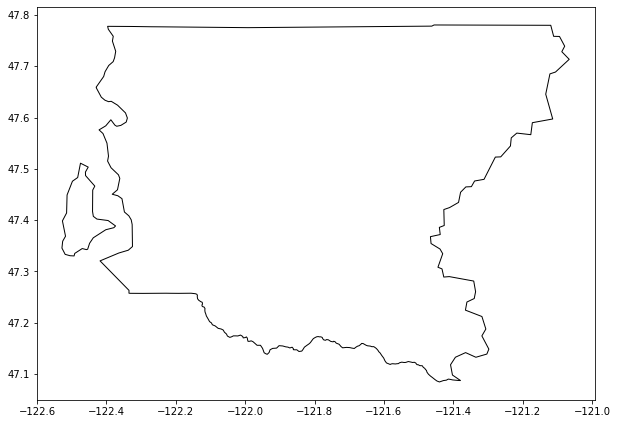

In [35]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
# county_df.head()

fig, gax = plt.subplots(figsize = (10,8))
county_df[county_df['COUNTYNS'] == '01531933'].plot(ax = gax, edgecolor='black',color='white')

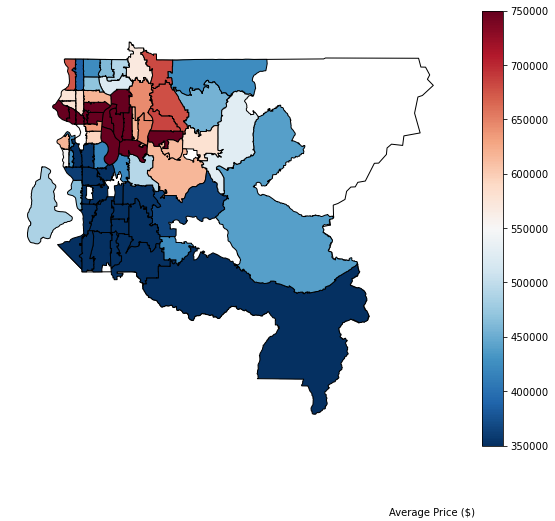

In [36]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
county_df[county_df['COUNTYNS'] == '01531933'].plot(ax = gax, edgecolor='black',color='white')

# # Plot the counties and pass 'rel_trump_share' as the data to color
merged_df.plot(
    ax=gax, edgecolor='black', column='price', legend=True, cmap='RdBu_r',
    vmin=350000, vmax=750000 #range of your column value for the color legend
)

# # Add text to let people know what we are plotting
gax.annotate('Average Price ($)',xy=(0.7, 0.01),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

plt.show()

There seems to be significant disparity in prices across the county. The southern and eastern parts of the county have significantly lower priced houses as compared to the north-western region. One reason for this is that Seattle is located in the north-western regions of this county. Seattle is home to the headqurters of the biggest tech companies - Amazon and Microsoft, which would explain the higher prices in that area. 

## Map 2

The first map gave us information regarding the average prices in different zipcodes in King County. However, without knowing other characteristics of houses in different zipcodes, the first map paints an inncomplete picture. The size of the lot on which houses are built is another factor that presumably influences prices. So for this map, we will proceed to make another **heat map of the average size of houses in different zipcodes.** This will tell us whether the reason prices were higher in some county and lower in another county can be attributed to the size of the houses.

We will follow the exact same approach that we took while making the first map, therefore, I will only be commenting on the final map. The only difference in the creation of the two maps is that we will be using "sqft_lot" as our variable of interest, rather than "price". 

In [37]:
grouped_df2 = df.groupby("zipcode")
mean_df2 = grouped_df2.mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,,
98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,0.000000,0.102210,3.337017,7.295580,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,6.693467,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412
98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,3.371429,7.542857,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571
98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,3.696429,8.488095,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,3.934998e+09,6.761854e+05,3.396078,2.100000,2323.333333,11904.403922,1.276471,0.003922,0.815686,3.494118,7.976471,1836.713725,486.619608,1960.843137,172.145098,47.742381,-122.369282,2186.196078,11690.239216
98178,4.291467e+09,3.106128e+05,3.305344,1.731870,1729.351145,8309.122137,1.185115,0.034351,0.534351,3.320611,6.816794,1325.992366,403.358779,1955.232824,84.057252,47.499118,-122.246969,1648.816794,8149.641221
98188,4.481851e+09,2.890783e+05,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,0.147059,3.330882,7.036765,1492.154412,310.617647,1965.507353,43.794118,47.447310,-122.280993,1636.279412,9752.801471


In [38]:
df3 = mean_df2.drop(columns = ['id',
 'sqft_living',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'yr_built'])

,price,sqft_lot
zipcode,,
98001,2.808047e+05,14937.450276
98002,2.342840e+05,7517.633166
98003,2.941113e+05,10603.096429
98004,1.355927e+06,13104.220820
98005,8.101649e+05,19928.785714
...,...,...
98177,6.761854e+05,11904.403922
98178,3.106128e+05,8309.122137
98188,2.890783e+05,10126.080882


In [39]:
zipcode_df["ZCTA5CE10"]=zipcode_df["ZCTA5CE10"].astype(float)
zipcode_df.dtypes

ZCTA5CE10      float64
GEOID10         object
CLASSFP10       object
MTFCC10         object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10      object
INTPTLON10      object
geometry      geometry
dtype: object

In [45]:
merged_df2 = zipcode_df.merge(df3, left_on="ZCTA5CE10", right_on="zipcode")

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,price,sqft_lot
0,98014.0,98014,B5,G6350,S,117330511,4642171,+47.6619712,-121.8919654,"POLYGON ((-122.00562 47.70899, -122.00439 47.7...",455617.112903,96902.862903
1,98019.0,98019,B5,G6350,S,198160630,2138510,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7...",424788.747368,39838.384211
2,98022.0,98022,B5,G6350,S,1050783148,7196209,+47.2160682,-122.1139056,"POLYGON ((-122.11589 47.21625, -122.11580 47.2...",315709.303419,74102.047009
3,98023.0,98023,B5,G6350,S,26760247,3619040,+47.3114910,-122.3628100,"MULTIPOLYGON (((-122.34200 47.32465, -122.3419...",286732.791583,10470.208417
4,98024.0,98024,B5,G6350,S,61952204,1346247,+47.5734245,-121.8991824,"POLYGON ((-121.97348 47.58392, -121.97347 47.5...",580526.790123,101724.814815
...,...,...,...,...,...,...,...,...,...,...,...,...
65,98006.0,98006,B5,G6350,S,27737341,1886298,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5...",859684.779116,13383.435743
66,98007.0,98007,B5,G6350,S,11351701,25498,+47.6138254,-122.1443652,"POLYGON ((-122.15494 47.58463, -122.15468 47.5...",617105.085106,10662.702128
67,98008.0,98008,B5,G6350,S,14306585,7402350,+47.6056618,-122.0993535,"POLYGON ((-122.13759 47.57975, -122.13757 47.5...",645507.378092,10188.448763
68,98010.0,98010,B5,G6350,S,38972441,2630481,+47.3119904,-122.0005030,"POLYGON ((-122.05445 47.31796, -122.05425 47.3...",423665.990000,55465.300000


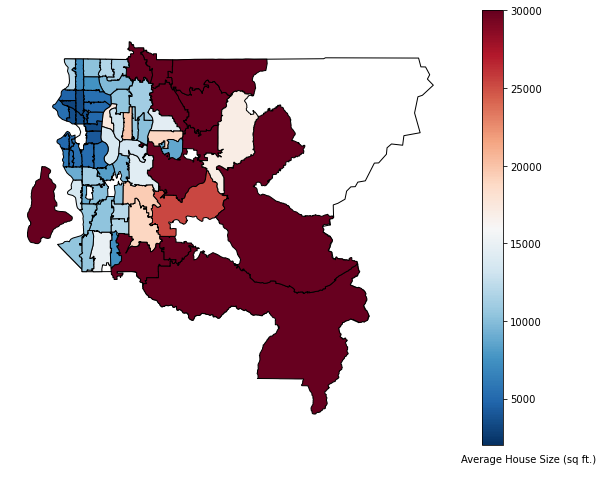

In [41]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
county_df[county_df['COUNTYNS'] == '01531933'].plot(ax = gax, edgecolor='black',color='white')

# # Plot the counties and pass 'rel_trump_share' as the data to color
merged_df2.plot(
    ax=gax, edgecolor='black', column='sqft_lot', legend=True, cmap='RdBu_r',
    vmin=2000, vmax=30000 #range of your column value for the color legend
)

# # Add text to let people know what we are plotting
gax.annotate('Average House Size (sq ft.)',xy=(0.76, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

plt.show()

This is a rather interesting result that we have obtained here; it seems that the areas/zip codes that had the highest prices of houses actually have the lowest house sizes. This is definitely something we weren't expecting as the result seems highly counter-intuitive. 

## Conclusion

In order to truly understand the prices in this houses, we will need to undertake a more sophisticted approach to our analysis. By sophisticated, I mean we will need to take into account other economic factors that aren't reflected in this dataset. These factors could include average income level by zip code, standardized quality of schools, healthcare etc. Certain characteristics that we explored in both these projects such as number of bedrooms, bathrooms, view etc. presumably have a standard relationship with prices across all counties in the country. However, with that being said, I was definitey extremely intrigued with the heat maps that were made, and am excited to continue further reasearch into determining the relationship of prices of houses with other variables in King County.


## Bonus - Average Adjusted Gross Income (AGI) by Zip Codes

In order to get more insights into the prices in King County, WA, I will be merging the current dataset with a dataset that provides the mean household income level for each zip code. 
This dataset was sourced from https://data.world/jonloyens/irs-income-by-zip-code.
By looking at the average income level across zip codes in King County, we can uncover more about why house prices are higher in the north-western regions of the county.

Again, we follow a similar approach to constructing this map as we did while constructing Map 1. As a result, I will only be commenting on unfamiliar lines of code. The difference in construction will arise from the addition of another dataset, i.e., the average income levels of citizens in each zip code in the county.

In [46]:
income_df = pd.read_csv(r'/Users/shivkhosla/Desktop/ECO225/Airbnb/IRSIncomebyZipCode.csv')
income_df

,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681
...,...,...,...,...,...,...,...,...,...,...,...
27785,WY,83126,150,8176,54.506667,150,8319,55.460000,110,4543,41.300000
27786,WY,83127,1400,87014,62.152857,1400,88398,63.141429,1060,58258,54.960377
27787,WY,83128,860,62354,72.504651,860,63379,73.696512,680,45017,66.201471
27788,WY,83414,200,21393,106.965000,200,22319,111.595000,170,15853,93.252941


In [47]:
list(income_df.columns)

['STATE',
 'ZIPCODE',
 'Number of returns',
 'Adjusted gross income (AGI)',
 'Avg AGI',
 'Number of returns with total income',
 'Total income amount',
 'Avg total income',
 'Number of returns with taxable income',
 'Taxable income amount',
 'Avg taxable income']

In [48]:
income_df2 = income_df.drop(columns = ['Number of returns with total income',
 'Total income amount',
 'Avg total income',
 'Number of returns with taxable income',
 'Taxable income amount',
 'Avg taxable income','STATE', 'Number of returns', 'Adjusted gross income (AGI)'])

,ZIPCODE,Avg AGI
0,0,51.963410
1,35004,51.832454
2,35005,38.905152
3,35006,47.400000
4,35007,53.687073
...,...,...
27785,83126,54.506667
27786,83127,62.152857
27787,83128,72.504651
27788,83414,106.965000


In [49]:
income_df2.dtypes

ZIPCODE      int64
Avg AGI    float64
dtype: object

In [50]:
grouped_df3 = df.groupby("zipcode")
mean_df3 = grouped_df3.mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,,
98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,0.000000,0.102210,3.337017,7.295580,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,6.693467,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412
98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,3.371429,7.542857,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571
98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,3.696429,8.488095,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,3.934998e+09,6.761854e+05,3.396078,2.100000,2323.333333,11904.403922,1.276471,0.003922,0.815686,3.494118,7.976471,1836.713725,486.619608,1960.843137,172.145098,47.742381,-122.369282,2186.196078,11690.239216
98178,4.291467e+09,3.106128e+05,3.305344,1.731870,1729.351145,8309.122137,1.185115,0.034351,0.534351,3.320611,6.816794,1325.992366,403.358779,1955.232824,84.057252,47.499118,-122.246969,1648.816794,8149.641221
98188,4.481851e+09,2.890783e+05,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,0.147059,3.330882,7.036765,1492.154412,310.617647,1965.507353,43.794118,47.447310,-122.280993,1636.279412,9752.801471


In [51]:
df7 = mean_df3.drop(columns = ['id',
 'sqft_living',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'yr_built'])

,price,sqft_lot
zipcode,,
98001,2.808047e+05,14937.450276
98002,2.342840e+05,7517.633166
98003,2.941113e+05,10603.096429
98004,1.355927e+06,13104.220820
98005,8.101649e+05,19928.785714
...,...,...
98177,6.761854e+05,11904.403922
98178,3.106128e+05,8309.122137
98188,2.890783e+05,10126.080882


Here, unlike in the previous maps, we will have to first merge the income dataset into our standard house prices dataset before we actually merge it with our zipcode dataset.

In [52]:
merged_df7 = income_df2.merge(df7, left_on='ZIPCODE', right_on='zipcode')

,ZIPCODE,Avg AGI,price,sqft_lot
0,98001,61.281496,2.808047e+05,14937.450276
1,98002,40.282852,2.342840e+05,7517.633166
2,98003,48.441711,2.941113e+05,10603.096429
3,98004,232.655756,1.355927e+06,13104.220820
4,98005,130.284021,8.101649e+05,19928.785714
...,...,...,...,...
65,98177,120.193087,6.761854e+05,11904.403922
66,98178,51.037355,3.106128e+05,8309.122137
67,98188,43.717699,2.890783e+05,10126.080882
68,98198,52.888136,3.028789e+05,10525.978571


In [53]:
merged_df8 = zipcode_df.merge(merged_df7, left_on="ZCTA5CE10", right_on="ZIPCODE")

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,ZIPCODE,Avg AGI,price,sqft_lot
0,98014.0,98014,B5,G6350,S,117330511,4642171,+47.6619712,-121.8919654,"POLYGON ((-122.00562 47.70899, -122.00439 47.7...",98014,95.655389,455617.112903,96902.862903
1,98019.0,98019,B5,G6350,S,198160630,2138510,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7...",98019,92.474624,424788.747368,39838.384211
2,98022.0,98022,B5,G6350,S,1050783148,7196209,+47.2160682,-122.1139056,"POLYGON ((-122.11589 47.21625, -122.11580 47.2...",98022,65.690768,315709.303419,74102.047009
3,98023.0,98023,B5,G6350,S,26760247,3619040,+47.3114910,-122.3628100,"MULTIPOLYGON (((-122.34200 47.32465, -122.3419...",98023,59.819815,286732.791583,10470.208417
4,98024.0,98024,B5,G6350,S,61952204,1346247,+47.5734245,-121.8991824,"POLYGON ((-121.97348 47.58392, -121.97347 47.5...",98024,107.897119,580526.790123,101724.814815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,98006.0,98006,B5,G6350,S,27737341,1886298,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5...",98006,144.348531,859684.779116,13383.435743
66,98007.0,98007,B5,G6350,S,11351701,25498,+47.6138254,-122.1443652,"POLYGON ((-122.15494 47.58463, -122.15468 47.5...",98007,79.973102,617105.085106,10662.702128
67,98008.0,98008,B5,G6350,S,14306585,7402350,+47.6056618,-122.0993535,"POLYGON ((-122.13759 47.57975, -122.13757 47.5...",98008,107.286356,645507.378092,10188.448763
68,98010.0,98010,B5,G6350,S,38972441,2630481,+47.3119904,-122.0005030,"POLYGON ((-122.05445 47.31796, -122.05425 47.3...",98010,85.517899,423665.990000,55465.300000


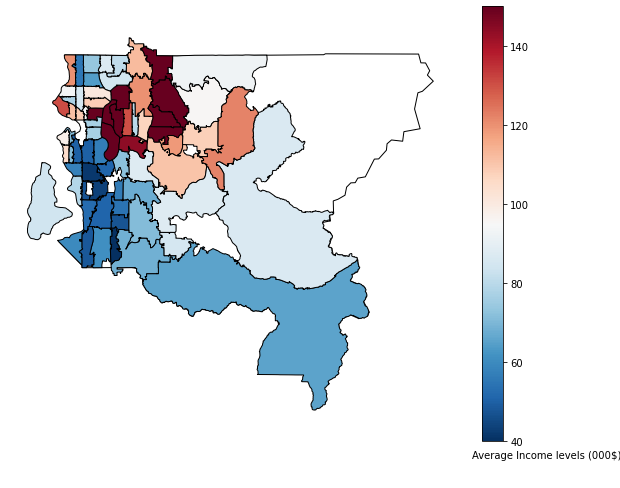

In [54]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
county_df[county_df['COUNTYNS'] == '01531933'].plot(ax = gax, edgecolor='black',color='white')

# # Plot the counties and pass 'rel_trump_share' as the data to color
merged_df8.plot(
    ax=gax, edgecolor='black', column='Avg AGI', legend=True, cmap='RdBu_r',
    vmin=40, vmax=150 #range of your column value for the color legend
)

# # Add text to let people know what we are plotting
gax.annotate('Average Income levels (000$)',xy=(0.76, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

plt.show()

With the construction of this map, we can now better understand the first two maps. This map has a semblance to the first map we created, which was the average prices of houses for each zip code in the county. The prices of houses in King County are clearly influenced more by income levels of its citizens, rather than the square footage available to them. 